# **Tokopedia Mobile App Reviews Sentiment Analysis & Topic Modeling**

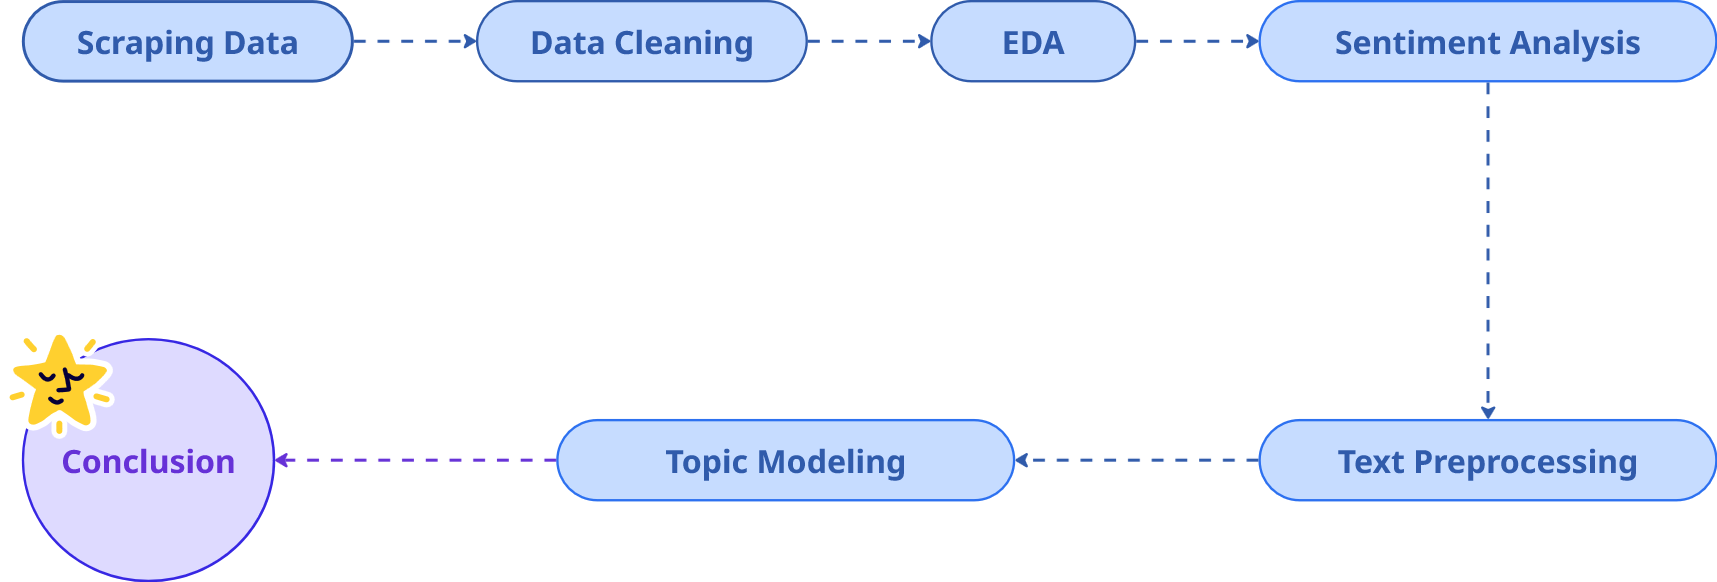

## Objective

- Identify the main themes from Tokopedia user reviews using topic modeling.

- Interpret and group topics into more understandable categories.

- Analyze the distribution of negative topics to determine users primary complaints.

- Explore positive reviews to understand the aspects most appreciated by users.

- Provide insights regarding priority areas for improvement and strengths that should be maintained.

## Outline

- Scraping Data : Collecting data from google play store website
- Data Cleaning : Fixing messy data like removing duplicates, handling missing values, or correcting errors.
- EDA : Taking a first look at the data with charts and stats to understand patterns and problems.
- Sentiment Analysis : Finding out if people’s opinions in the text are positive, negative, or neutral.
- Text Preprocessing : Preparing text for analysis, such as tokenizing words, normalizing, or scaling values.
- Topic Modeling : Discovering the main themes or topics that appear in a large collection of text.
- Conclusion : Summarizing the findings and insights from all the steps to answer the main question.

---

# 🚨 Install & Import Library

## Install Library

In [1]:
#google play scraper : Used to collect app data and user reviews directly from Google Play Store.
!pip install google-play-scraper

In [2]:
# Adds a simple progress bar to loops, so you can see how long a process takes.
!pip install tqdm
# A toolkit for natural language processing, like tokenizing, stemming, or removing stopwords.
!pip install nltk
# Provides powerful pre-trained models for tasks such as text classification, sentiment analysis, and translation.
!pip install transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.0/802.0 kB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [nltk]1/2 [nltk]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 96.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.5/561.5 kB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 91.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 93.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [transformers] [transformers]


In [3]:
# to discover and understand hidden topics in documents or user reviews without manually reading them one by one
!pip install bertopic
!pip install einops

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 98.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 78.0 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.40-cp312-cp312-linux_x86_64.whl size=847019 sha256=bb1d0d8ff8faf430afb36c9571dee36ab8914d84c3ad02adb1ce235d7adb4b50
  Stored in directory: /home/jovyan/.cache/pip/wheels/80/e7/bb/173ca0d8ce12718c4b5e6e01619c99653579b56969b97604b2
Successfully built hdbscan
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [bertopic]4/6 [sentence-transformers]


## Import Library

In [4]:
# Import library for play store reviews scraping
from google_play_scraper import Sort, reviews
import pandas as pd

In [5]:
# Import library for visualize data
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Import library for teks processing & model inference
import re
import string
from tqdm import tqdm
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from transformers import pipeline
tqdm.pandas()
import asyncio
import time
import transformers

[nltk_data] Downloading package punkt_tab to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...


In [7]:
# Import library for topic modeling
from bertopic import BERTopic
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer
from bertopic.representation import MaximalMarginalRelevance
from umap import UMAP

---

# 🗃️ Scraping Data

Scrape user reviews of the Tokopedia application from the Google Play Store and save the scraped data into a CSV file.

In [8]:
result = reviews(
    'com.tokopedia.tkpd', # Id Tokopedia mobile app in play store
    lang='id', # languege code reviews
    country='id', # country code reviews
    sort=Sort.MOST_RELEVANT, # filtering method reviews
    count=100000 # count of data reviews
)

In [9]:
result = pd.DataFrame(result[0]) # Convert data scraping into table dataframe
result.info() # To show feature, count & type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviewId              100000 non-null  object        
 1   userName              100000 non-null  object        
 2   userImage             100000 non-null  object        
 3   content               100000 non-null  object        
 4   score                 100000 non-null  int64         
 5   thumbsUpCount         100000 non-null  int64         
 6   reviewCreatedVersion  69632 non-null   object        
 7   at                    100000 non-null  datetime64[ns]
 8   replyContent          48662 non-null   object        
 9   repliedAt             48662 non-null   datetime64[ns]
 10  appVersion            69632 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 8.4+ MB


- The number of data rows varies between 4,000 and 100,000, which means there are some empty rows.

- The data has around 11 columns/features, but based on the column names, some columns will be removed because they don’t contain meaningful values.


In [10]:
result.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,cdc86cee-466f-4a0a-bc15-e15ddfe632c0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Beli barang yang datang tidak sesuai, sudah sa...",1,7,3.327.0,2025-09-02 08:33:38,None,NaT,3.327.0
1,b28e8c1e-af14-41e8-afed-7cc405e68976,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasinya mudah dimengerti,tapi sayang denga...",1,51,3.328.0,2025-09-02 22:31:39,None,NaT,3.328.0
2,77c6c053-8716-4584-b4d5-10db294e36d8,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,saya sarankan tidak usah pakai tokped. aplikas...,1,43,3.327.0,2025-08-29 15:11:10,None,NaT,3.327.0
3,66307246-82d2-4f3d-8ef7-8825071ad7c5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"banyak penipunya, uang pembayaran saya tertaha...",1,74,3.326.0,2025-08-26 13:01:54,None,NaT,3.326.0
4,e65d1057-9df8-4f32-8139-dbd28077abd4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Jujur saja belanja di Tokopedia lumayan nyaman...,2,43,3.326.0,2025-08-25 07:26:20,None,NaT,3.326.0


- reviewId: Unique ID for each review.
- userName: Name of the user who wrote the review.
- userImage: URL or link to the user’s profile picture.
- content: The text of the review written by the user.
- score: Rating given by the user.
- thumbsUpCount: Number of likes on the review.
- reviewCreatedVersion: App version when the review was created.
- at: Date and time when the review was published.
- replyContent: Developer’s reply to the review.
- repliedAt: Date and time when the reply was given.
- appVersion: App version when the review data was collected or last known.

In [11]:
data = result.to_csv('result.csv', index=False) # Save dataframe as csv file

---

# 🧼 Data Cleaning

This step is about cleaning the raw scraped data to make it ready for the next stages, such as handling duplicates, missing values, or incorrect data types.

## Delete Missing & Duplicate Rows

In [12]:
# Load csv file
data = pd.read_csv('result.csv')
# Remove feature not have insight
data = data.drop(['reviewId','userName', 'userImage', 'reviewCreatedVersion', 'replyContent', 'repliedAt'],axis=1)

- The data was saved in CSV format, then loaded and stored in a variable called data.
- Some columns that don’t contain meaningful values were removed to simplify the dataset, including 'reviewId', 'userName', 'userImage', 'reviewCreatedVersion', 'replyContent', and 'repliedAt'.

In [13]:
data = data.drop_duplicates() # remove duplicated rows
data = data.dropna() # remove missing rows

data.info() # show results

<class 'pandas.core.frame.DataFrame'>
Index: 69632 entries, 0 to 99998
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        69632 non-null  object
 1   score          69632 non-null  int64 
 2   thumbsUpCount  69632 non-null  int64 
 3   at             69632 non-null  object
 4   appVersion     69632 non-null  object
dtypes: int64(2), object(3)
memory usage: 3.2+ MB


In [14]:
data.head(1)

,content,score,thumbsUpCount,at,appVersion
0,"Beli barang yang datang tidak sesuai, sudah sa...",1,7,2025-09-02 08:33:38,3.327.0


- The number of rows in each column/feature is now consistent, with 69.649 rows, meaning there are no more missing or duplicate data.
- The at column shows the date and time when a review was posted by a user, but since only the review month in 2025 is needed, filtering will be applied.
- The appVersion column shows the application version, but the version values are too complex, so simplification is needed to make the analysis easier.

## Data Transformation

### Month

In [15]:
data['at'] = pd.to_datetime(data['at']) # Convert feature at type to datetime type
data = data[data['at'].dt.year == 2025] # Extract data only in 2025

data['month'] = data['at'].dt.month.astype('str') # Extract mont feature & make it string type
data = data[data['month'].isin(['6', '7', '8'])] # Filtering data in motnh 6, 7 & 8
data = data.drop(columns=['at'], axis=1) # Deleted at feature
data['month'].unique()

array(['8', '7', '6'], dtype=object)

- Since only data from the year 2025 is needed, the dataset was filtered to include only that year.
- Then, because the focus is on data from June, July, and August (months 6, 7, and 8), additional filtering was applied.

### App Version

In [16]:
print(data['appVersion'].unique()) # Check app version unique value

['3.327.0' '3.326.0' '3.325.0' '3.323.0' '3.319.0' '3.316.1' '3.320.0'
 '3.324.0' '3.322.0' '3.318.0' '3.317.0' '3.321.0' '3.316.0' '3.322.1'
 '3.315.0' '3.314.0' '3.310.0' '3.312.0' '3.309.0' '3.306.0' '3.313.0'
 '3.305.0' '3.304.0' '3.311.0' '3.219' '4.01-test' '3.119' '3.260'
 '3.260.1' '2.26.1' '3.164' '3.218' '3.116' '3.163' '3.294.1' '2.1.3'
 '3.166' '3.243' '3.200.1' '3.220' '3.247.1' '3.303.0' '3.279.0' '3.41'
 '2.20.3' '3.283.0' '3.134' '3.268.0' '3.256' '3.214' '3.301.1' '3.277.0'
 '3.292.0' '3.295.0' '3.157' '3.148' '3.114' '3.137' '3.147.1' '3.273.2'
 '3.302.0' '3.298.0' '3.192' '3.165' '3.196' '3.264' '2.5.1' '3.12' '3.72'
 '3.175' '3.172' '3.193' '3.284.0' '3.181' '3.156' '3.108' '3.251'
 '3.53.1' '3.179' '3.106' '3.222' '3.225' '3.274.0' '3.201' '3.266'
 '3.155' '3.265' '3.281.0' '3.289.0' '3.135' '3.215' '3.238.1' '3.249'
 '3.230' '3.269.0' '3.126.1' '3.136' '3.197' '3.141' '3.260.2' '3.170'
 '3.160.1' '3.288.0' '3.293.1' '3.234' '3.90' '3.240.1' '3.202' '3.226'
 '3.146

In [17]:
data['minorVersion'] = data['appVersion'] # Change feature appVersion name to minorVersion
data = data.drop(columns=['appVersion'], axis=1) # Deleted appVersion feature
data['majorVersion'] = data['minorVersion'].str[:3] # Round minorVersion value & save to majorVersion feature
print(data['majorVersion'].unique()) # To show unique value of majorVersion

['3.3' '3.2' '4.0' '3.1' '2.2' '2.1' '3.4' '2.5' '3.7' '3.5' '3.9' '3.6'
 '3.8']


- Previously, the number of app versions used by users was very large, meaning the app versions were highly varied.
- To simplify, only the main versions were taken, resulting in 13 primary app versions used by the users.

---

# 🔎 Exploratory Data Analysis

Exploratory Data Analysis (EDA) is the initial step used to find insights in the data, such as patterns, anomalies/outliers, data distribution, and more.

## Data Deskriptif

In [18]:
data.describe() # To show statistcs summary from data

,score,thumbsUpCount
count,3898.000000,3898.000000
mean,2.443304,6.596973
std,1.713355,66.102381
min,1.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,5.000000,2.000000
max,5.000000,3457.000000


- The average score is 2.4, which is quite low on a scale of 1–5. This means most users are not satisfied with the Tokopedia app.
- The standard deviation is 1.6, showing that the ratings/scores vary quite a lot.
- The maximum number of likes is 3,457, meaning there is a review that received a lot of attention from other users, likely because the review was relatable to them.

## Score

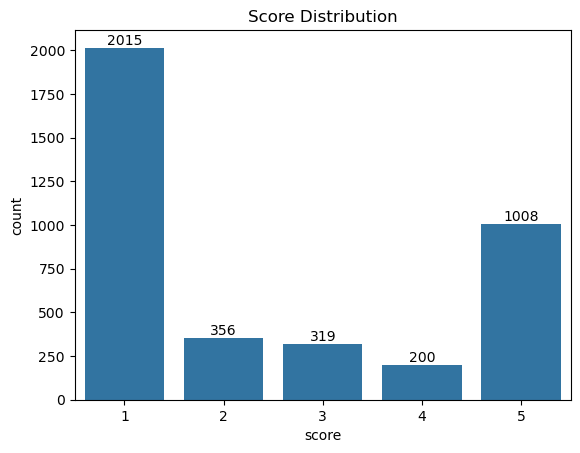

In [19]:
ax = sns.countplot(data=data, x='score') # To show score distribution
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Score Distribution')
plt.show()

- The distribution of scores/ratings in the data looks very unbalanced or extreme.
- Score 1 is the most dominant, giving the insight that most user reviews are negative or show dissatisfaction.
- However, Score 5 also has a considerable number, although not as many as Score 1. This shows that, on the other hand, many users are also satisfied with the Tokopedia app.
- The remaining scores (2, 3, and 4) are very few, meaning only a small number of users felt neutral about the app.
- From these results, it can be concluded that user satisfaction is very polarized — either mostly negative or highly positive.

## Major Version

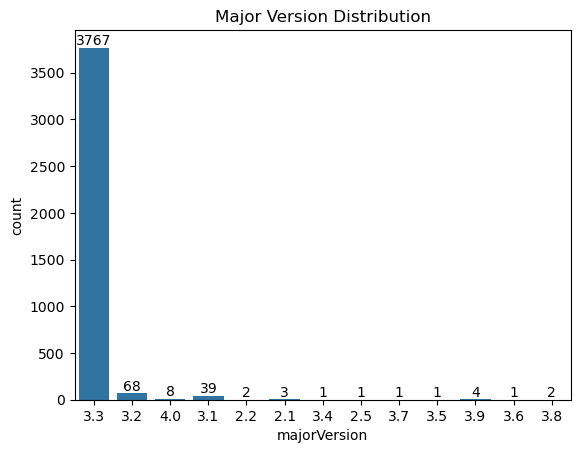

In [20]:
ax=sns.countplot(data=data, x='majorVersion') # To show major version app distribution
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Major Version Distribution')
plt.show()

- We can see that the distribution of Tokopedia app versions is very different for each version, with version 3.3 being the one used by most users.
- Other versions have very few users, meaning they were rarely used between June, July, and August 2025.

## Score VS Thumbs Up Count

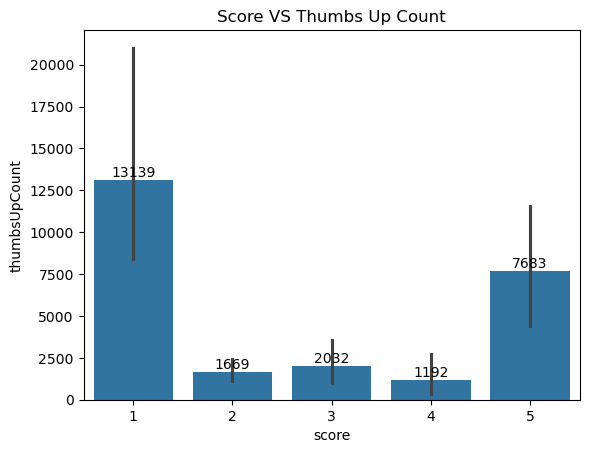

In [21]:
# To show distribution thumbs up count per score.
ax = sns.barplot(data=data, x='score', y='thumbsUpCount', estimator="sum")
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Score VS Thumbs Up Count')
plt.show()

- It turns out that the distribution of likes for each score is very different.
- Score 1 has the highest number of likes compared to other scores, meaning negative issues or dissatisfaction received a lot of attention and support from users.
- However, Score 5 also has many likes, showing that many users also felt satisfied with the Tokopedia app.
- As before, the number of likes for Scores 2, 3, and 4 is relatively small.

## Major Version VS Score

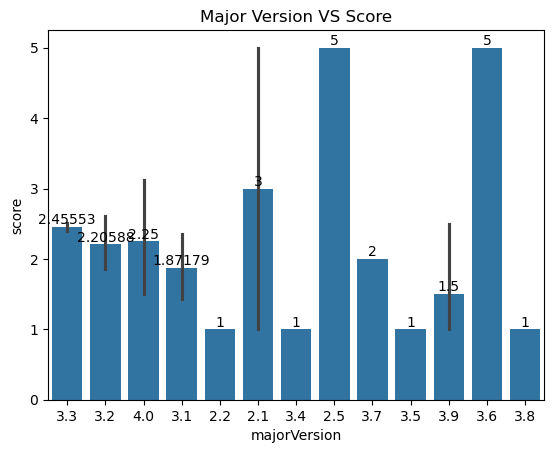

In [22]:
# To show mean score per category major version
ax = sns.barplot(data=data, x='majorVersion', y='score')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Major Version VS Score')
plt.show()

App version 3.3, which has the most users, actually has a very low average score. This means that most users gave negative reviews.

---

# ❤️ Sentiment Analysis

Sentiment analysis is a method used to analyze user reviews in order to understand user satisfaction with the Tokopedia app. It works by classifying user emotions into sentiment labels: NEGATIVE and POSITIVE. In this case, the score feature is used to determine the sentiment: scores 1, 2, and 3 are labeled as Negative, while scores 4 and 5 are labeled as Positive.

In [23]:
def sentiment(score):
    if score in [1,2,3]:
        return "NEGATIVE"
    else:
        return "POSITIVE"

In [24]:
data['labels'] = data["score"].progress_apply(sentiment) # Save sentiment labels in labels feature on data dataframe
data.head()

100% 3898/3898 [00:00<00:00, 3542664.57it/s]


,content,score,thumbsUpCount,month,minorVersion,majorVersion,labels
2,saya sarankan tidak usah pakai tokped. aplikas...,1,43,8,3.327.0,3.3,NEGATIVE
3,"banyak penipunya, uang pembayaran saya tertaha...",1,74,8,3.326.0,3.3,NEGATIVE
4,Jujur saja belanja di Tokopedia lumayan nyaman...,2,43,8,3.326.0,3.3,NEGATIVE
5,Ternyata ke absurd an tokped masih berlanjut s...,1,34,8,3.325.0,3.3,NEGATIVE
6,tokopedia jadi pavorit saya untuk belanja onli...,1,28,8,3.326.0,3.3,NEGATIVE


## EDA Sentiment Labels

### Sentiment Distribution

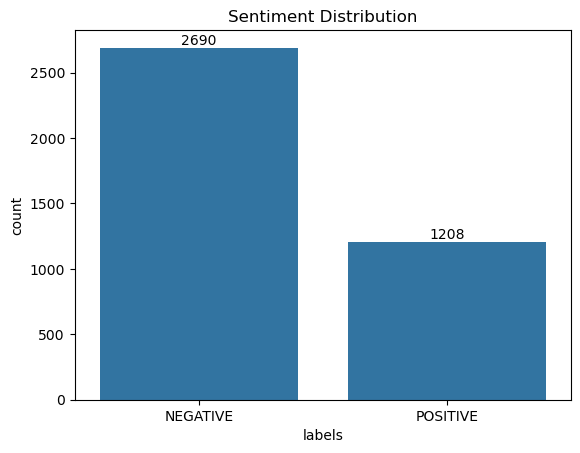

In [25]:
# To show sentiment labels distributions
ax = sns.countplot(data=data, x='labels')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Sentiment Distribution')
plt.show()

As noted earlier, the most dominant score is 1, which shows that most user reviews of the Tokopedia app carry a negative sentiment.

### Sentiment VS Thumbs Up Count

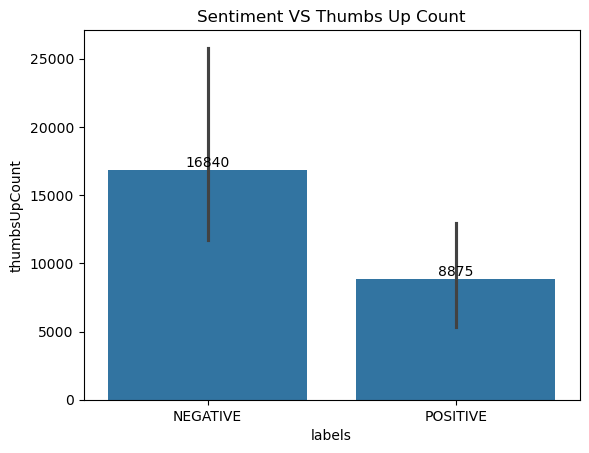

In [26]:
# To see count total of thumbs up count per labels
ax=sns.barplot(data=data, x="labels", y="thumbsUpCount", estimator="sum")
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Sentiment VS Thumbs Up Count')
plt.show()

In addition, the number of likes on negative sentiment reviews is higher than on positive sentiment reviews. This means many users paid more attention to or supported negative issues, likely because they were related to their own experiences.

### Sentiment VS Month

<Axes: xlabel='month', ylabel='count'>

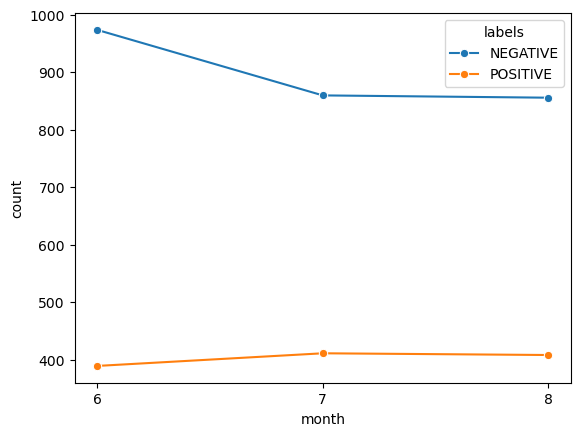

In [27]:
# To show labels distributions per month in 2025
plot_data = data.groupby(["month", "labels"]).size().reset_index(name="count")
sns.lineplot(data=plot_data, x="month", y="count", hue="labels", marker="o")

From June to August, user reviews consistently showed negative sentiment. This means that during this period, most users were dissatisfied with the Tokopedia app, and no significant improvement in user satisfaction was observed.

### Sentiment VS Major Version

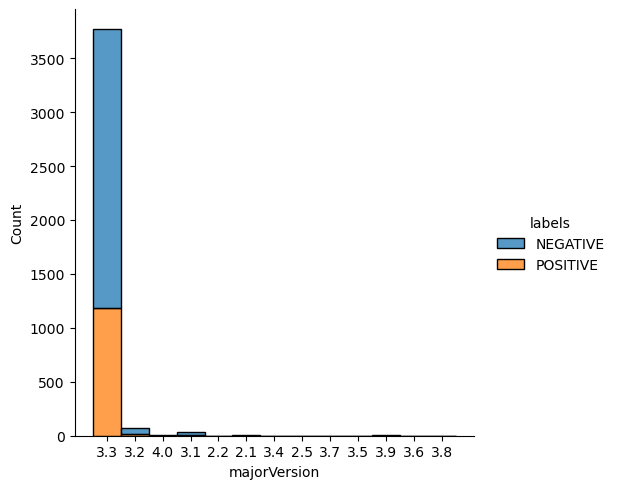

In [28]:
# To see count total of major version per labels
sns.displot(data=data, x="majorVersion", hue='labels', multiple='stack')

Version 3.3, which is the majority version used by users, has a very high negative sentiment. This means that version 3.3 contains many negative issues that need to be fixed immediately.

---

# 📜 Text Preprocessing

Text preprocessing is the step done before topic modeling. In this stage, text data is prepared properly so that the topic modeling process can produce the expected results. Some tasks in this step include removing numbers, punctuation, emojis, and other unnecessary symbols.

In [29]:
# Collect and filtering data from content feature and make it a new dataframe
docs = pd.DataFrame(data['content'].reset_index(drop=True), columns=['content'])

### Document Translated Model

One of the first steps before text preprocessing is translating the text data from Indonesian into English. The main reason is to make the data easier to process and to produce better outputs.

In addition, translating Indonesian text into English before preprocessing helps take advantage of more complete NLP models and resources, standardizes vocabulary, reduces ambiguity, and makes cross-language analysis easier, leading to more accurate results.

In [30]:
translator = pipeline(
    "translation", #pipeline model type
    model="facebook/nllb-200-distilled-600M", # name of model for translation
    src_lang="ind_Latn", # id/ code first language
    tgt_lang="eng_Latn" # id/ code output language
)

config.json:   0%|          | 0.00/846 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.46G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.46G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/564 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/4.85M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.3M [00:00<?, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


In [31]:
# Function for translation teks in docs
def translate(text):
  return translator(text)[0]["translation_text"]

In [33]:
# Apply function translation in data content feature
docs['text_translate'] = docs['content'].progress_apply(translate)

 49% 1914/3898 [06:43<04:03,  8.16it/s]Your input_length: 226 is bigger than 0.9 * max_length: 200. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)
 54% 2104/3898 [07:10<03:51,  7.77it/s]Your input_length: 215 is bigger than 0.9 * max_length: 200. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)
 58% 2280/3898 [07:33<02:36, 10.35it/s]Your input_length: 181 is bigger than 0.9 * max_length: 200. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)
 89% 3450/3898 [09:32<00:27, 16.01it/s]Your input_length: 232 is bigger than 0.9 * max_length: 200. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)
100% 3898/3898 [10:09<00:00,  6.39it/s]


### Documen/ Text Cleanning

In [34]:
# 1. Remove numbers, symbols, emojis, links, mentions, etc.
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)       # remove mentions
    text = re.sub(r'#[A-Za-z0-9_]+', '', text)       # remove hashtags
    text = re.sub(r'RT[\s]+', '', text)              # remove retweets "RT"
    text = re.sub(r"http\S+", '', text)              # remove URLs
    text = re.sub(r'[0-9]+', '', text)               # remove numbers
    text = re.sub(r'[^\w\s]', '', text)              # remove symbols/emoji
    text = text.replace('\n', ' ')                   # remove newlines
    text = text.strip()
    return text

# 2. Lowercasing
def casefoldingText(text):
    return text.lower()

# 3. Tokenization
def tokenizing(text):
    return word_tokenize(text)

# 4. Remove stopwords
def stopwordstext(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return filtered_tokens

# 5. Lemmatization
def lemmatizing(tokens):
    lemmatizer = WordNetLemmatizer()
    processed_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(processed_tokens)

In [35]:
# Apply all function of text preprocessing
docs['text_clean'] = docs['text_translate'].progress_apply(cleaningText)
docs['text_lower'] = docs['text_clean'].progress_apply(casefoldingText)
docs['text_tokenizing'] = docs['text_lower'].progress_apply(tokenizing)
docs['text_stopwords'] = docs['text_tokenizing'].progress_apply(stopwordstext)
docs['text_akhir'] = docs['text_stopwords'].progress_apply(lemmatizing)

100% 3898/3898 [00:00<00:00, 130394.60it/s]
100% 3898/3898 [00:00<00:00, 2611307.62it/s]
100% 3898/3898 [00:00<00:00, 36818.99it/s]
100% 3898/3898 [00:00<00:00, 44948.53it/s]
100% 3898/3898 [00:01<00:00, 3301.94it/s]


In [36]:
docs.head()

,content,text_translate,text_clean,text_lower,text_tokenizing,text_stopwords,text_akhir
0,saya sarankan tidak usah pakai tokped. aplikas...,I suggest you don't use a topped-up app. It's ...,I suggest you dont use a toppedup app Its a re...,i suggest you dont use a toppedup app its a re...,"[i, suggest, you, dont, use, a, toppedup, app,...","[suggest, dont, use, toppedup, app, really, ba...",suggest dont use toppedup app really bad app d...
1,"banyak penipunya, uang pembayaran saya tertaha...","Many of the scammers, my payment money is stuc...",Many of the scammers my payment money is stuck...,many of the scammers my payment money is stuck...,"[many, of, the, scammers, my, payment, money, ...","[many, scammers, payment, money, stuck, tokped...",many scammer payment money stuck tokped report...
2,Jujur saja belanja di Tokopedia lumayan nyaman...,"Honestly, shopping on Tokopedia is pretty conv...",Honestly shopping on Tokopedia is pretty conve...,honestly shopping on tokopedia is pretty conve...,"[honestly, shopping, on, tokopedia, is, pretty...","[honestly, shopping, tokopedia, pretty, conven...",honestly shopping tokopedia pretty convenient ...
3,Ternyata ke absurd an tokped masih berlanjut s...,It turns out that the absurdity of a tokped th...,It turns out that the absurdity of a tokped th...,it turns out that the absurdity of a tokped th...,"[it, turns, out, that, the, absurdity, of, a, ...","[turns, absurdity, tokped, thing, still, going...",turn absurdity tokped thing still going free c...
4,tokopedia jadi pavorit saya untuk belanja onli...,Tokopedia became my favorite for online shoppi...,Tokopedia became my favorite for online shoppi...,tokopedia became my favorite for online shoppi...,"[tokopedia, became, my, favorite, for, online,...","[tokopedia, became, favorite, online, shopping...",tokopedia became favorite online shopping nice...


In [37]:
docs = docs["text_clean"].reset_index(drop=True)
data = data.reset_index(drop=True)

docs = pd.concat([data,docs], axis=1)
docs.head()

,content,score,thumbsUpCount,month,minorVersion,majorVersion,labels,text_clean
0,saya sarankan tidak usah pakai tokped. aplikas...,1,43,8,3.327.0,3.3,NEGATIVE,I suggest you dont use a toppedup app Its a re...
1,"banyak penipunya, uang pembayaran saya tertaha...",1,74,8,3.326.0,3.3,NEGATIVE,Many of the scammers my payment money is stuck...
2,Jujur saja belanja di Tokopedia lumayan nyaman...,2,43,8,3.326.0,3.3,NEGATIVE,Honestly shopping on Tokopedia is pretty conve...
3,Ternyata ke absurd an tokped masih berlanjut s...,1,34,8,3.325.0,3.3,NEGATIVE,It turns out that the absurdity of a tokped th...
4,tokopedia jadi pavorit saya untuk belanja onli...,1,28,8,3.326.0,3.3,NEGATIVE,Tokopedia became my favorite for online shoppi...


---

# 💭 Topic Modeling

Topic modeling is done when the text data is already considered fully clean. It is carried out using BERT, a framework for contextual representation that groups documents based on topics. BERT produces more accurate topics compared to classical methods because it understands the meaning of words within the context of sentences.

## Data/ Document Splitting

Before doing topic modeling, the text data is split based on sentiment labels into negative data and positive data. The purpose of this step is to make it easier to interpret the resulting topics.

In [38]:
# Splitting data into two different dataframe such as negative & positive
negative = docs[docs['labels']=='NEGATIVE']['text_clean']
positive = docs[docs['labels']=='POSITIVE']['text_clean']

## Topic Modeling Model

In topic modeling, there are several parameters that need to be considered, including:

- embedding_model: Converts text into numerical vectors that represent word meaning.
- umap_model: Reduces vector dimensions to make clustering easier.
- hdbscan_model = KMeans(n_clusters=n_cluster): Groups documents into n_cluster topics (using KMeans instead of HDBSCAN).
- vectorizer_model: Converts text into tokens for analysis.
- ctfidf_model: Calculates topic representation using C-TF-IDF.
- representation_model: Combines embeddings and tokenization to generate the final topics.

In [39]:
# Load embedding model: converts text into semantic vectors
embedding_model = pipeline(
    "feature-extraction",
    model="Qwen/Qwen3-Embedding-0.6B"
)

# Dimensionality reduction model (UMAP)
umap_model = UMAP(
    n_neighbors=15, # consider 15 nearest neighbors to preserve local structure
    n_components=5, # reduce embeddings to 5 dimensions
    min_dist=0.0, # allows points to be packed more closely
    metric='cosine', # measure distance based on cosine similarity
    random_state=42
)

# Vectorizer: converts text into token counts
vectorizer_model = CountVectorizer(
    min_df=10, # only keep words/phrases that appear at least 10 times
    stop_words="english"
)

# Class-based TF-IDF transformer
ctfidf_model = ClassTfidfTransformer(bm25_weighting=True)
# - Uses BM25 weighting for more accurate class-based keyword extraction

# Keyword representation model using Maximal Marginal Relevance (MMR)
representation_model = MaximalMarginalRelevance(diversity=0.3)
# - diversity=0.3: balance between relevance and diversity of selected keywords

def topic(n_cluster):
    # Function to create a BERTopic model with a fixed number of clusters
    topic_model = BERTopic(
        embedding_model=embedding_model,           # text embeddings
        umap_model=umap_model,                     # dimensionality reduction
        hdbscan_model=KMeans(n_clusters=n_cluster),
        # use Agglomerative Clustering instead of default HDBSCAN
        # number of clusters defined by n_cluster

        vectorizer_model=vectorizer_model,         # text to tokens
        ctfidf_model=ctfidf_model,                 # topic representation with C-TF-IDF
        representation_model=representation_model, # keyword extraction with MMR
        calculate_probabilities=True,              # compute topic probabilities per document
        verbose=True                               # show training logs
    )
    return topic_model

config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.19G [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

Device set to use cuda:0


## 😡 Negative Topic

### Topic Modelling

In [40]:
negative_topic = topic(30) # Output 50 topics
negative_info = negative_topic.fit_transform(negative) # Inference with negative data
negative_info = negative_topic.get_topic_info() # Get topic info result
negative_info.to_csv('tokped_negative.csv') # Save topic result
negative_info # To show topic result

2025-09-05 13:18:14,714 - BERTopic - Embedding - Transforming documents to embeddings.
100% 2690/2690 [00:25<00:00, 104.49it/s]
2025-09-05 13:18:40,470 - BERTopic - Embedding - Completed ✓
2025-09-05 13:18:40,470 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-09-05 13:18:48,657 - BERTopic - Dimensionality - Completed ✓
2025-09-05 13:18:48,658 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-09-05 13:18:48,688 - BERTopic - Cluster - Completed ✓
2025-09-05 13:18:48,690 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-09-05 13:18:56,620 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,Representative_Docs
0,0,217,0_shopee_tokped_stores_price,"[shopee, tokped, stores, price, buy, disappoin...",[Im tired of Tokopedia Care Im tired of Shoope...
1,1,190,1_app_apk_update_apps,"[app, apk, update, apps, weird, annoying, wors...","[I cant open it at the time of the update, Jus..."
2,2,120,2_discount_promo_price_scam,"[discount, promo, price, scam, checkout, there...",[Congratulations you got a discount of k reall...
3,3,117,3_mistakes_trouble_complicated_looking,"[mistakes, trouble, complicated, looking, ther...",[Ive been down times Ive been down times Ive...
4,4,115,4_cancellation_cancel_canceled_sellers,"[cancellation, cancel, canceled, sellers, buye...",[The sellers slow now I cant cancel even thoug...
5,5,115,5_delivery_shipment_arrived_shipping,"[delivery, shipment, arrived, shipping, expedi...",[Delivery is not updated x already late delive...
6,6,114,6_courier_returned_complaint_didnt,"[courier, returned, complaint, didnt, funds, o...",[I refused and gave proofs of the chat and the...
7,7,114,7_courier_shipping_delivery_package,"[courier, shipping, delivery, package, expedit...",[Please reevaluate the courier services that w...
8,8,111,8_buy_store_products_make,"[buy, store, products, make, toped, shopping, ...",[Ill give you a little suggestion why is it th...
9,9,108,9_upload_updates_product_menu,"[upload, updates, product, menu, photos, produ...",[The last update was rough I couldnt even log ...


After the negative topic modeling was done, a dataframe was generated containing several features, including:
- Topic: Identification number of the topic.
- Count: Number of documents included in this topic.
- Name: Automatically generated topic name.
- Representation: Keywords that appear most often in this topic, e.g., [courier, package].
- Representative_Docs: Example sentences or documents most relevant to the topic.

### Sub Topic Intepretation

In [41]:
negative_topic.set_topic_labels({
    0: "Customer service only via chat and unhelpful so fraud, lost balance, or hacked accounts are not resolved",
    1: "App has problems after updates so it cannot be opened at all",
    2: "Discounts and vouchers are unclear and often fail so users feel cheated and move to Shopee",
    3: "Customer service always gives the same and lengthy answers so problems are never solved and users get frustrated",
    4: "Sellers are slow in processing orders and order status is confusing so items are delivered late and buyers waste time",
    5: "Deliveries are often delayed for days so items do not arrive on time and buyers are disappointed",
    6: "The return process is slow and not transparent so items are already returned but funds are not refunded",
    7: "Many couriers are slow and do not update tracking so packages get stuck in warehouses and buyers do not know the progress",
    8: "Prices in the cart change to become more expensive at checkout so buyers feel disadvantaged",
    9: "App updates often force users so notifications are disturbing and sometimes login is not possible",
    10: "There are many scams and fake products on the platform so consumers feel unsafe shopping",
    11: "The app connection is often poor so the app becomes slow or inaccessible",
    12: "Payment methods often error especially GoPay so transactions fail even though balance is available",
    13: "The posting and selling system is unclear so sellers find it difficult to sell and buyers get confused",
    14: "Dead stores or inactive sellers are still displayed so buyers waste time and refunds take a long time",
    15: "Product prices are too expensive compared to competitors so users feel disadvantaged and switch to other platforms",
    16: "Complaint service is slow and responses are like bots so user complaints are not handled seriously",
    17: "The chat feature has problems and there are many spam promotions so communication with sellers is disrupted",
    18: "Refund funds cannot be withdrawn or accessed so buyers’ money is stuck and cannot be used",
    19: "After merging with TikTok many seller features disappeared so sellers find it difficult to sell",
    20: "Login account issues are difficult to fix so users cannot log in or change phone numbers",
    21: "Transaction history often disappears or is incomplete so users have difficulty tracking purchases",
    22: "The order completion system is inconsistent so orders can be closed unilaterally and funds go to sellers even though buyers are harmed",
    23: "The app often shows repeated unclear error messages like 'I don’t know' so users get confused and cannot continue activities",
    24: "Search and filter features are inaccurate so products shown do not match the keywords",
    25: "System response and services are very slow so transactions and complaints are delayed",
    26: "Promotional programs like free shipping and discounts are no longer available so users feel they do not benefit",
    27: "The app looks unprofessional in handling refunds and customer service does not help so user trust decreases",
    28: "The process of entering addresses and verifying data is difficult so users find it hard to complete transactions",
    29: "Shipping options are limited and the quality has declined so deliveries are slow and problematic"
})



negative_info = negative_topic.get_document_info(negative)
negative_info["Sub Topic"] = negative_info["CustomName"]
negative_info = negative_info[["Document","Topic", "Sub Topic"]]
negative_info.head()

,Document,Topic,Sub Topic
0,I suggest you dont use a toppedup app Its a re...,27,The app looks unprofessional in handling refun...
1,Many of the scammers my payment money is stuck...,0,Customer service only via chat and unhelpful s...
2,Honestly shopping on Tokopedia is pretty conve...,0,Customer service only via chat and unhelpful s...
3,It turns out that the absurdity of a tokped th...,26,Promotional programs like free shipping and di...
4,Tokopedia became my favorite for online shoppi...,0,Customer service only via chat and unhelpful s...


- The results of topic modeling produced 50 topics from thousands of user reviews. This is quite a large number, so simplification was done by grouping them into subtopics.

- In addition, the subtopic names were created manually by observing the patterns shown in the representation feature.

### Topic Sanitizing/ Clusterring

- After interpretation, the automatically generated topics can now be read and understood more easily thanks to the manual interpretation process.

- However, the number of interpreted topics reached 50, which is quite a lot to describe user review conditions. The solution is to perform clustering or grouping of topics, resulting in 10 main topics.


In [42]:
def get_topic_group(topic_number):
    if topic_number in [0, 1, 2]:
        return "Platform Accessibility & Reliability"
    elif topic_number in [3, 4, 5]:
        return "Promotions & Discounts"
    elif topic_number in [6, 7, 8]:
        return "Delivery & Logistics"
    elif topic_number in [9, 10, 11]:
        return "Shipment & Tracking Issues"
    elif topic_number in [12, 13, 14]:
        return "App Performance & Technical Issues"
    elif topic_number in [15, 16, 17]:
        return "Payment & Account Management"
    elif topic_number in [18, 19, 20]:
        return "Search & Filter Functionality"
    elif topic_number in [21, 22, 23]:
        return "Customer Service & Support"
    elif topic_number in [24, 25, 26]:
        return "Promotional Transparency & Cashback"
    elif topic_number in [27, 28, 29]:
        return "User Experience & Navigation"


negative_info["Main Topic"] = negative_info["Topic"].progress_apply(get_topic_group)
negative_info = negative_info[["Document","Main Topic", "Sub Topic"]]

negative = data[data['labels']=='NEGATIVE'][["thumbsUpCount","month", "minorVersion","majorVersion"]]
negative_info = pd.concat([negative_info.reset_index(drop=True), negative.reset_index(drop=True)], axis=1)
negative_info

100% 2690/2690 [00:00<00:00, 1414046.59it/s]


,Document,Main Topic,Sub Topic,thumbsUpCount,month,minorVersion,majorVersion
0,I suggest you dont use a toppedup app Its a re...,User Experience & Navigation,The app looks unprofessional in handling refun...,43,8,3.327.0,3.3
1,Many of the scammers my payment money is stuck...,Platform Accessibility & Reliability,Customer service only via chat and unhelpful s...,74,8,3.326.0,3.3
2,Honestly shopping on Tokopedia is pretty conve...,Platform Accessibility & Reliability,Customer service only via chat and unhelpful s...,43,8,3.326.0,3.3
3,It turns out that the absurdity of a tokped th...,Promotional Transparency & Cashback,Promotional programs like free shipping and di...,34,8,3.325.0,3.3
4,Tokopedia became my favorite for online shoppi...,Platform Accessibility & Reliability,Customer service only via chat and unhelpful s...,28,8,3.326.0,3.3
...,...,...,...,...,...,...,...
2685,tokopedia hrs sprites stores that send old sto...,Platform Accessibility & Reliability,Customer service only via chat and unhelpful s...,0,6,3.318.0,3.3
2686,Updated Mulu ah tokped this,Promotional Transparency & Cashback,Search and filter features are inaccurate so p...,0,8,3.324.0,3.3
2687,Since the merger Tiktoks application has becom...,Search & Filter Functionality,After merging with TikTok many seller features...,0,7,3.322.0,3.3
2688,The freezer the discounted freezer the complic...,Platform Accessibility & Reliability,Discounts and vouchers are unclear and often f...,0,8,3.326.0,3.3


### EDA (Topic)

#### Main Topic

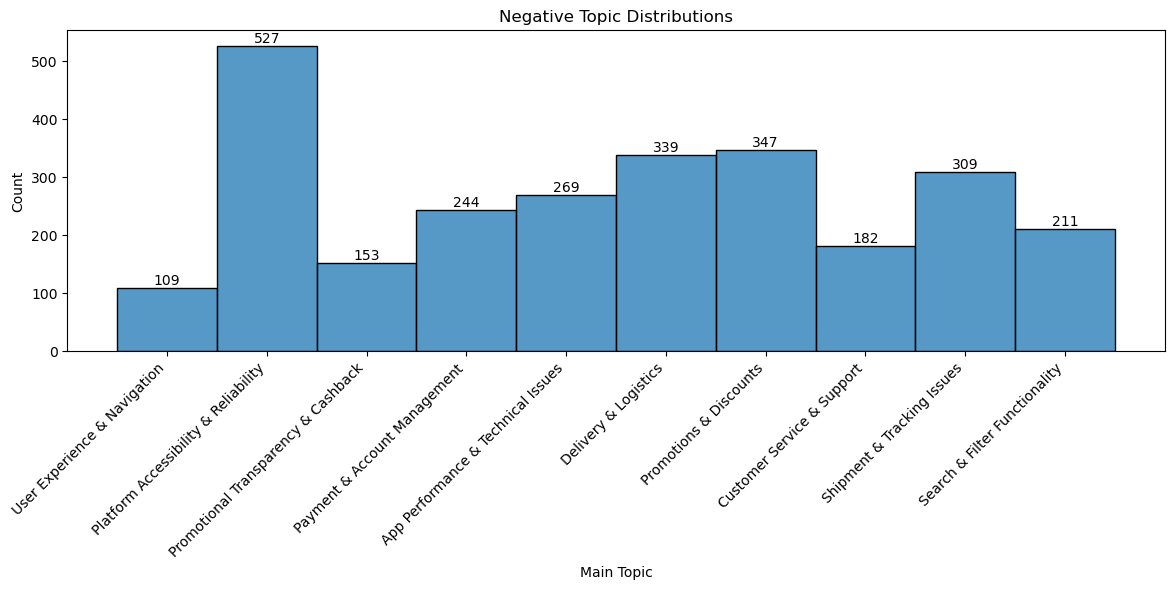

In [43]:

plt.figure(figsize=(12, 6))
ax=sns.histplot(data=negative_info, x="Main Topic")

plt.xticks(rotation=45, ha="right")
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Negative Topic Distributions')
plt.tight_layout()
plt.show()

The distribution of user reviews reveals ten main topics. The majority of complaints focus on App Performance & Technical Issues and Payment & Account Management, highlighting technical reliability and financial/security as key concerns. User Experience & Navigation and Seller Management & Marketplace Issues follow, while Refunds, Delivery, Promotions, and Customer Support appear at moderate levels. Product Pricing & Availability and Platform Accessibility & Reliability record the lowest complaints but remain relevant.

#### Main Topic VS Thumb Up Count

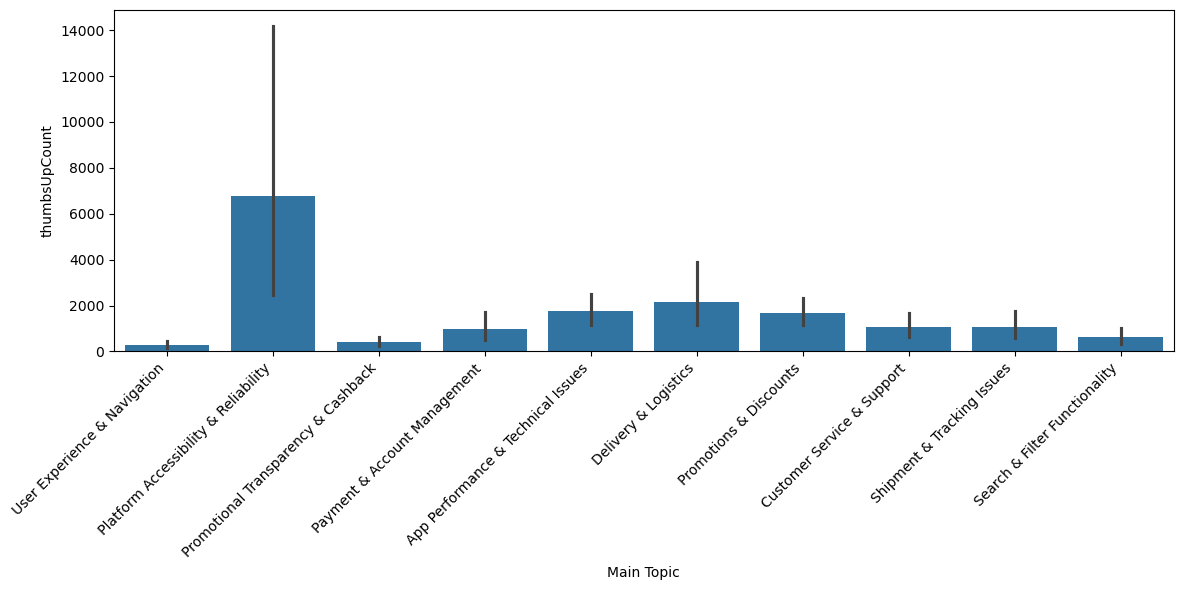

In [44]:
plt.figure(figsize=(12, 6))
sns.barplot(data=negative_info, x="Main Topic", y="thumbsUpCount", estimator='sum')

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

- The chart shows the distribution of user reviews across ten main topics. Payment & Account Management stands out as the most reported issue, indicating major concerns with financial processes and account handling.

- Product Pricing & Availability, User Experience & Navigation, and Delivery & Logistics appear at moderate levels, while Refunds & Disputes, Promotions & Discounts, Platform Reliability, and Customer Support show relatively lower but still notable concerns.

#### Main Topic VS Month

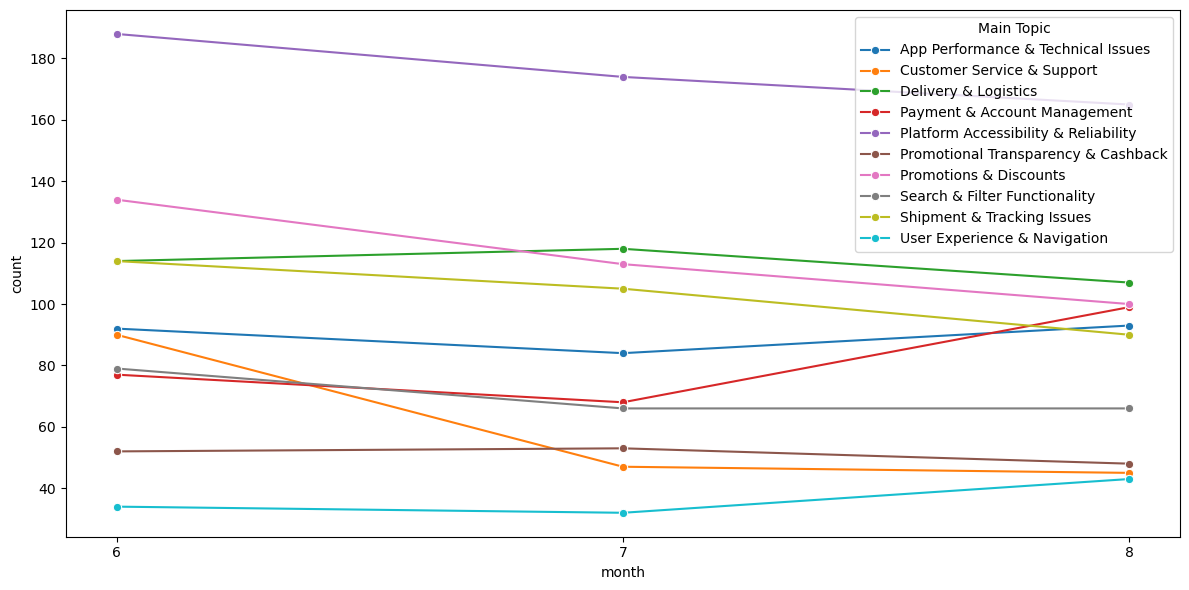

In [45]:
plt.figure(figsize=(12, 6))
plot_data = negative_info.groupby(["month", "Main Topic"]).size().reset_index(name="count")

sns.lineplot(data=plot_data, x="month", y="count", hue="Main Topic", marker="o")
plt.tight_layout()
plt.show()

App Performance & Technical Issues and Payment & Account Management remain dominant, though both drop in July before stabilizing. Seller Management & Marketplace Issues, Refunds & Disputes, and Delivery & Logistics show upward trends, while User Experience & Navigation continues to decline. Promotions & Discounts slightly decrease, whereas Product Pricing & Availability and Customer Service & Support gradually rise. Platform Accessibility & Reliability stays the lowest, with a minor uptick in August.

## 😊 Positive Topic

### Topic Modelling

In [46]:
positive_topic = topic(12)
positive_info = positive_topic.fit_transform(positive)
positive_info = positive_topic.get_topic_info()
positive_info.to_csv('tokped_positive.csv')
positive_info

2025-09-05 13:25:53,406 - BERTopic - Embedding - Transforming documents to embeddings.
100% 1208/1208 [00:10<00:00, 109.86it/s]
2025-09-05 13:26:04,408 - BERTopic - Embedding - Completed ✓
2025-09-05 13:26:04,408 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-09-05 13:26:06,044 - BERTopic - Dimensionality - Completed ✓
2025-09-05 13:26:06,044 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-09-05 13:26:06,048 - BERTopic - Cluster - Completed ✓
2025-09-05 13:26:06,049 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-09-05 13:26:09,256 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,Representative_Docs
0,0,178,0_okay_helpful_shop_free,"[okay, helpful, shop, free, toped, thank, easi...",[Its all right Its all right Its all right Its...
1,1,162,1_like_thank_shop_better,"[like, thank, shop, better, theres, helpful, f...",[Im satisfied I just need to say to increase t...
2,2,115,2_easier_free_shop_helpful,"[easier, free, shop, helpful, toped, doesnt, f...",[Buy a lot more profits monggo the dealers sho...
3,3,100,3_easier_fast_better_shop,"[easier, fast, better, shop, free, okay, helpf...","[Its easy to get your moneys worth, Its very e..."
4,4,98,4_store_shop_doesnt_shopping,"[store, shop, doesnt, shopping, theres, easier...","[In the online store here the most complete, F..."
5,5,95,5_free_theres_like_toped,"[free, theres, like, toped, thank, better, eas...","[Hopefully a lot of CODs and free donations, A..."
6,6,90,6_toped_theres_store_like,"[toped, theres, store, like, doesnt, free, bet...",[Im a toped thn user and perna member diamond ...
7,7,88,7_doesnt_like_toped_theres,"[doesnt, like, toped, theres, okay, thank, bet...",[Its a good app and I just like the constraint...
8,8,79,8_better_toped_theres_store,"[better, toped, theres, store, shop, easier, d...",[Im one of the longtime Tokopedia users and I ...
9,9,75,9_better_doesnt_fast_theres,"[better, doesnt, fast, theres, toped, free, th...",[Please admin the reason for the cancellation ...


### Main Topic Intepretation

In [49]:
positive_topic.set_topic_labels({
    0: "Competitive pricing, good value for money",
    1: "Satisfied but needs better service and courier reliability",
    2: "Helpful app, safe shopping, many cashback offers",
    3: "Easy transactions and safe shopping experience",
    4: "Complete online store, fast delivery service",
    5: "Lots of promotions, discounts, and free shipping",
    6: "Unclear complaint handling, expensive costs, weak customer support",
    7: "App slow, filter limited, verification process difficult",
    8: "Complicated payment verification and balance usage",
    9: "Return and cancellation process unclear and slow",
    10: "Fast response and good customer service",
    11: "Helpful and user-friendly application"
})




positive_info = positive_topic.get_document_info(positive)
positive_info["Main Topic"] = positive_info["CustomName"]
positive_info = positive_info[["Document","Topic", "Main Topic"]]
positive_info

,Document,Topic,Main Topic
0,Tokopedia is getting weirder Theres a store th...,1,Satisfied but needs better service and courier...
1,The price of the goods is already on its own a...,2,"Helpful app, safe shopping, many cashback offers"
2,Please dont make the app a lot of mistakes Th...,7,"App slow, filter limited, verification process..."
3,Advice expedition the fastest in tokopedia rep...,9,Return and cancellation process unclear and slow
4,for TOPED the previous version of the TOPED ap...,7,"App slow, filter limited, verification process..."
...,...,...,...
1203,This is an amazing pedia shop,0,"Competitive pricing, good value for money"
1204,Good The stars prove it,0,"Competitive pricing, good value for money"
1205,Good help,10,Fast response and good customer service
1206,The process is fast,10,Fast response and good customer service


In [ ]:
def get_topic_group(topic_number):
    if topic_number in [6, 8, 14, 19, 20, 22]:
        return "App Usability & Shopping Experience"
    elif topic_number in [2, 5, 10]:
        return "Pricing & Promotions"
    elif topic_number in [4, 12, 19, 21]:
        return "Delivery & Logistics"
    elif topic_number in [7]:
        return "Digital Services & Top-ups"
    elif topic_number in [9, 16, 17, 24]:
        return "App Features & User Satisfaction"
    elif topic_number in [11, 15, 18]:
        return "Trust & Reliability"
    elif topic_number in [1, 3]:
        return "Platform Growth & Monitoring"
    elif topic_number in [23]:
        return "Overall Shopping Satisfaction"
    elif topic_number in [13]:
        return "Returns & Balance Management"
    else:  # topic_number in [0]
        return "App Development & Improvement"


positive_info["Main Topic"] = positive_info["Topic"].progress_apply(get_topic_group)
positive_info = positive_info[["Document","Main Topic", "Sub Topic"]]

positive = data[data['labels']=='POSITIVE'][["thumbsUpCount","month", "minorVersion","majorVersion"]]
positive_info = pd.concat([positive_info.reset_index(drop=True), positive.reset_index(drop=True)], axis=1)
positive_info

### Main Topic Distribution

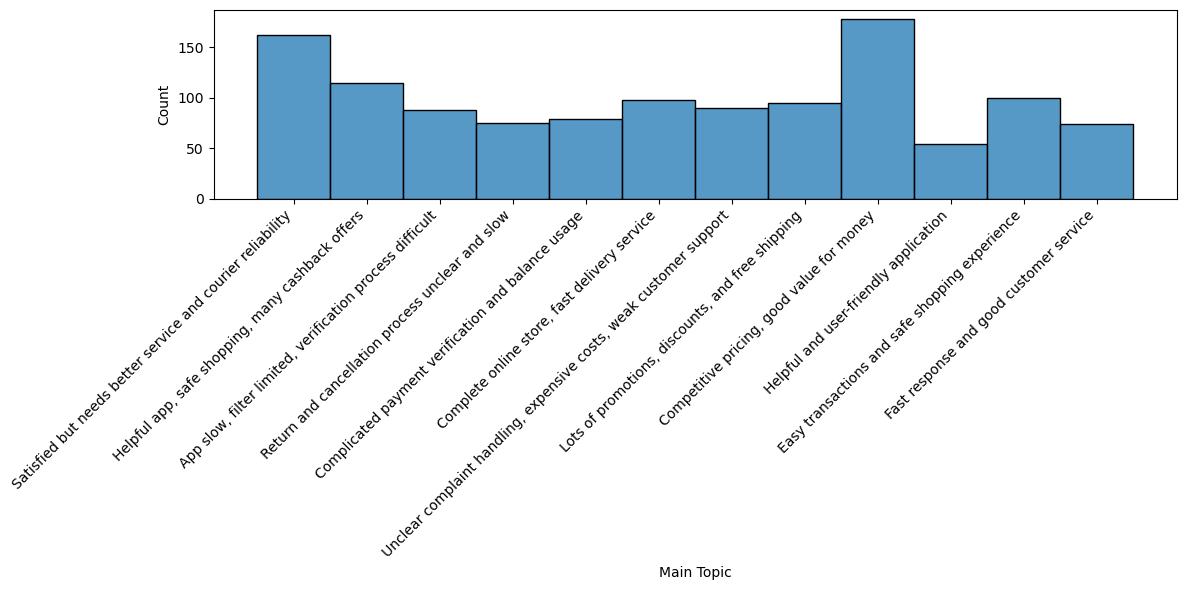

In [50]:
plt.figure(figsize=(12, 6))
sns.histplot(data=positive_info, x="Main Topic")

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

The most frequent praises are related to Returns & Balance Management and Pricing & Promotions, showing that users appreciate smooth financial handling and attractive deals. Positive feedback also highlights Platform Growth & Monitoring, App Development & Improvement, and Delivery & Logistics as strong points. Other notable aspects include App Usability & Shopping Experience, Trust & Reliability, and User Satisfaction, reflecting that customers value convenience, security, and overall reliability in their shopping experience.

---

# 🎯 Conclusion

- The analysis successfully identified key themes within Tokopedia user reviews, revealing both major complaints and appreciated features.

- Negative reviews were dominated by technical issues (app performance, account/payment problems) and transactional concerns (refunds, logistics, and customer support), highlighting priority areas for improvement.

- On the other hand, positive feedback emphasized smooth shopping experiences, easy-to-use apps, attractive promotions, and reliable services, which represent Tokopedia’s strengths.

- Overall, the study provides actionable insights: Tokopedia should prioritize fixing technical and transactional pain points while maintaining its strengths in usability, promotions, and reliability to improve overall user satisfaction and loyalty.